In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


读取降雨量和径流数据

In [2]:
rain_APCP = pd.read_csv("D:/CSSP/out_data/surface_PRE_data.csv")#降雨量数据
rain_APCParray = np.array(rain_APCP)
rain_APCP2 = pd.read_csv("D:/CSSP/out_data/surface_PRE_THdata.csv")#降雨量数据
rain_APCParray2 = np.array(rain_APCP)
flow_obs = pd.read_csv('D:/CSSP/out_data/tuotuoriver/data/tuotuoriver.csv',encoding='GBK')#径流量数据
flow_obs = np.array(flow_obs)
year = 1979
day = 0
flow_obsArray = np.zeros((366,9))
for j in range(len(flow_obs)):#笨蛋写出的循环
    if flow_obs[j,1] == year:
        flow_obsArray[day,year-1979] = flow_obs[j,4]
        day =day + 1
    else :#下一年
        day = 0
        year = year + 1
        flow_obsArray[day,year-1979] =  flow_obs[j,4]


In [4]:
rain_APCParray.shape


(366, 9)

<Figure size 640x480 with 0 Axes>

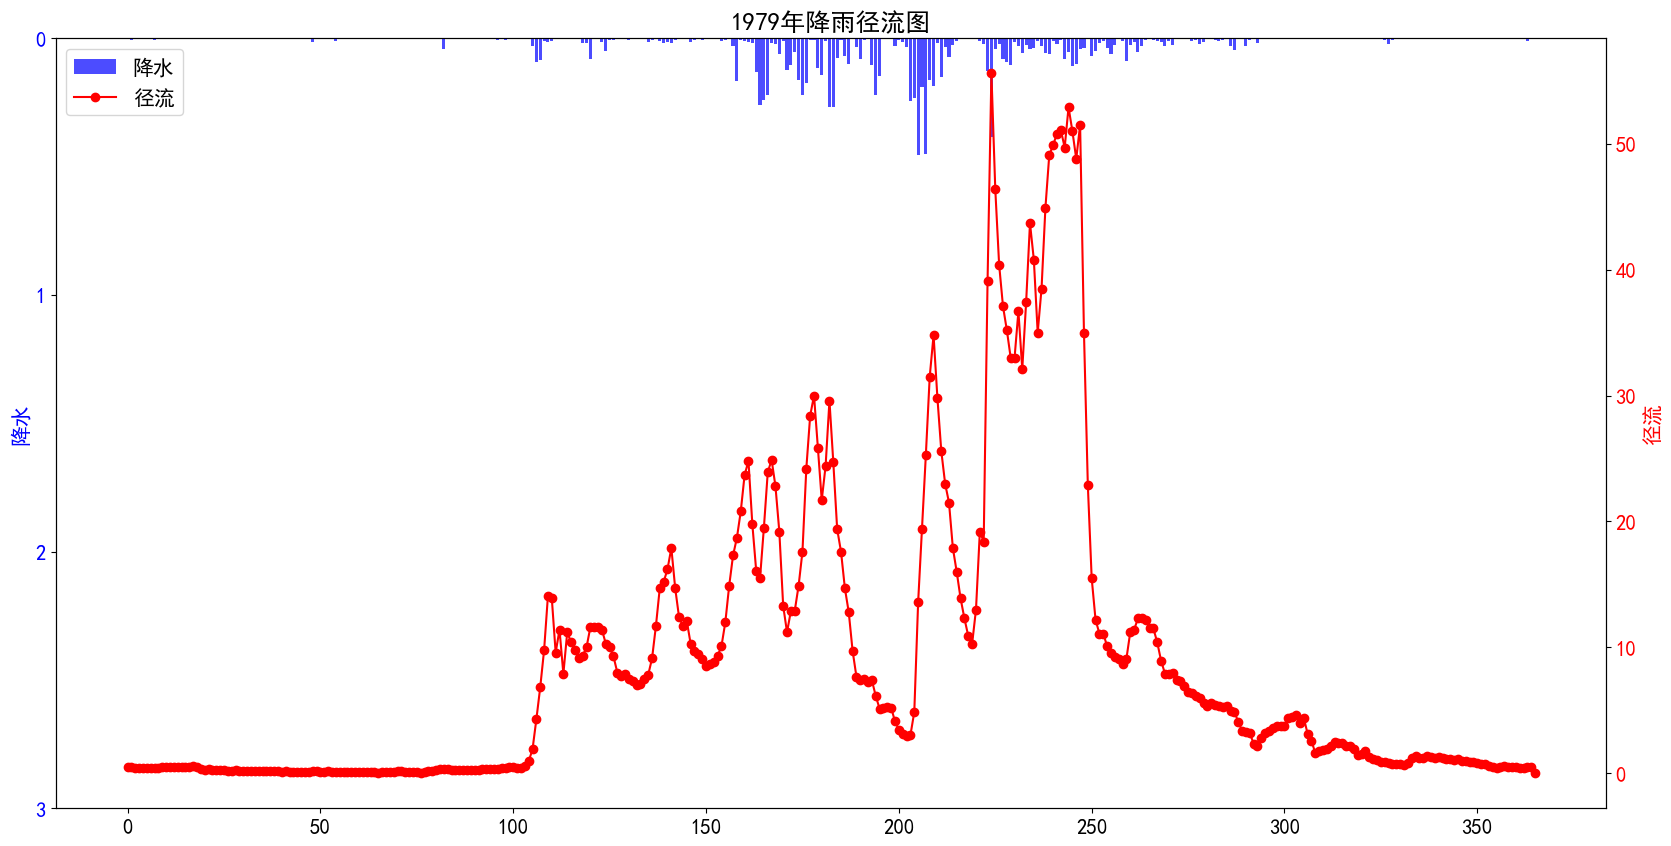

<Figure size 640x480 with 0 Axes>

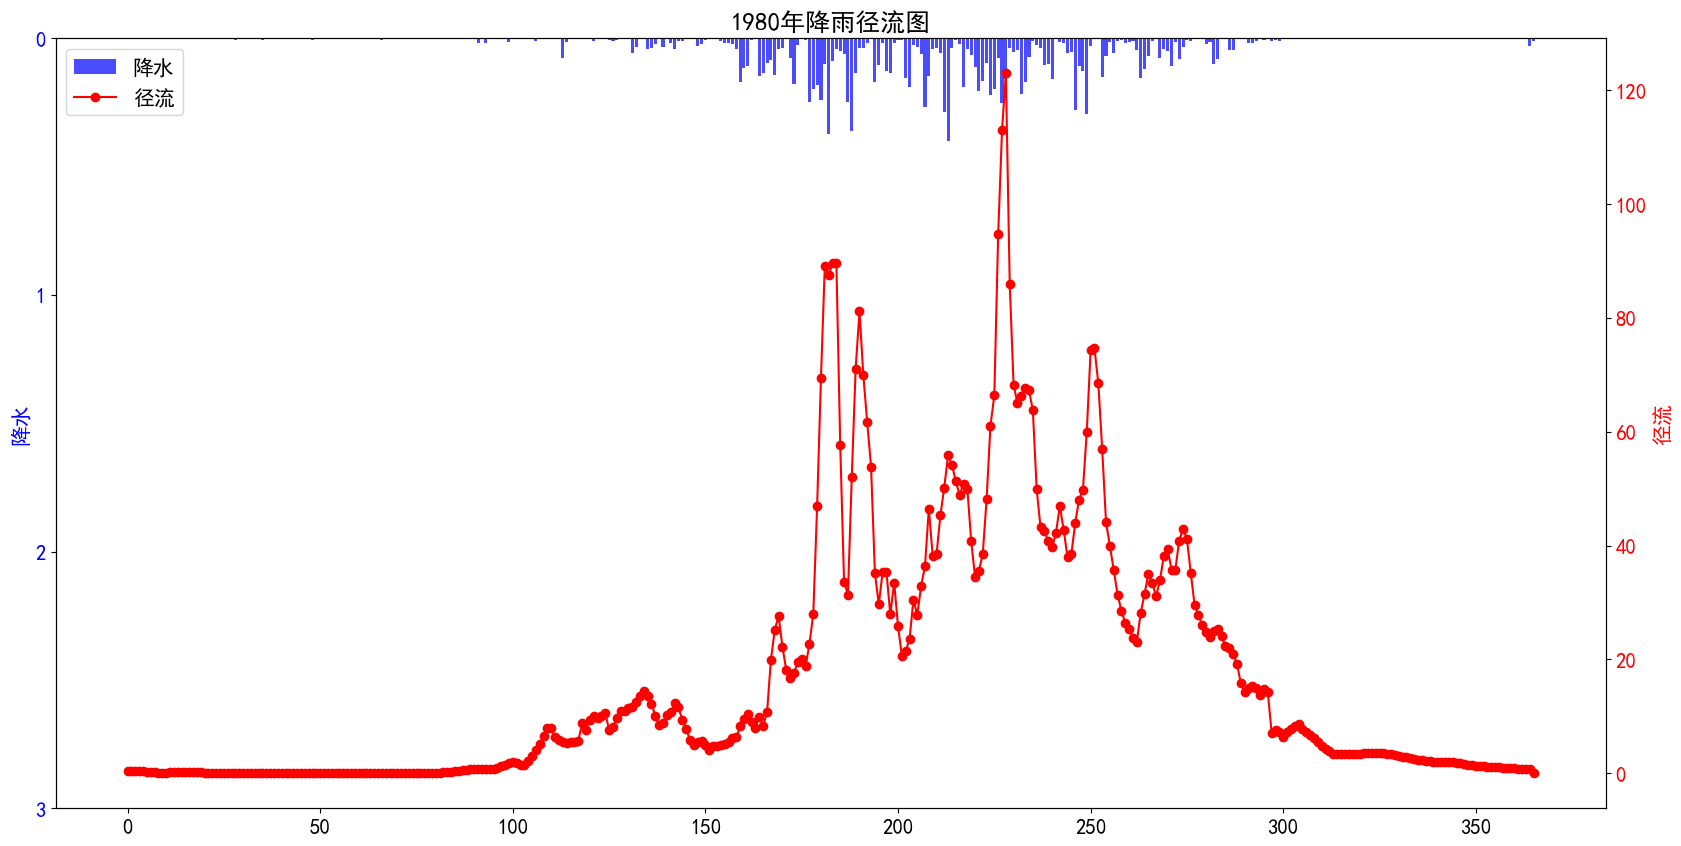

<Figure size 640x480 with 0 Axes>

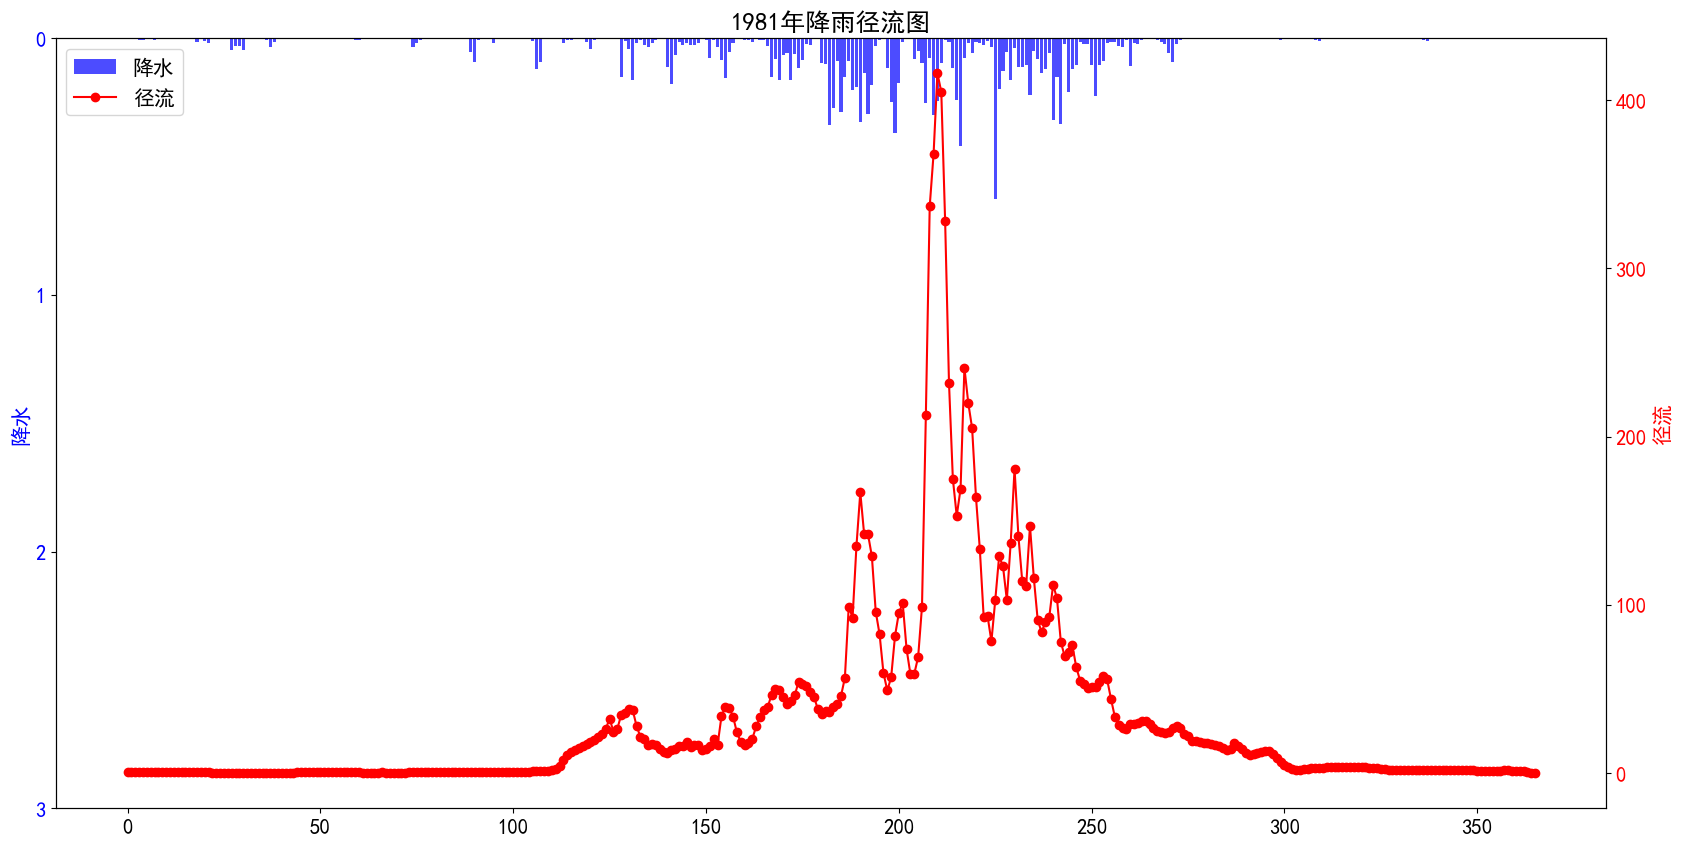

<Figure size 640x480 with 0 Axes>

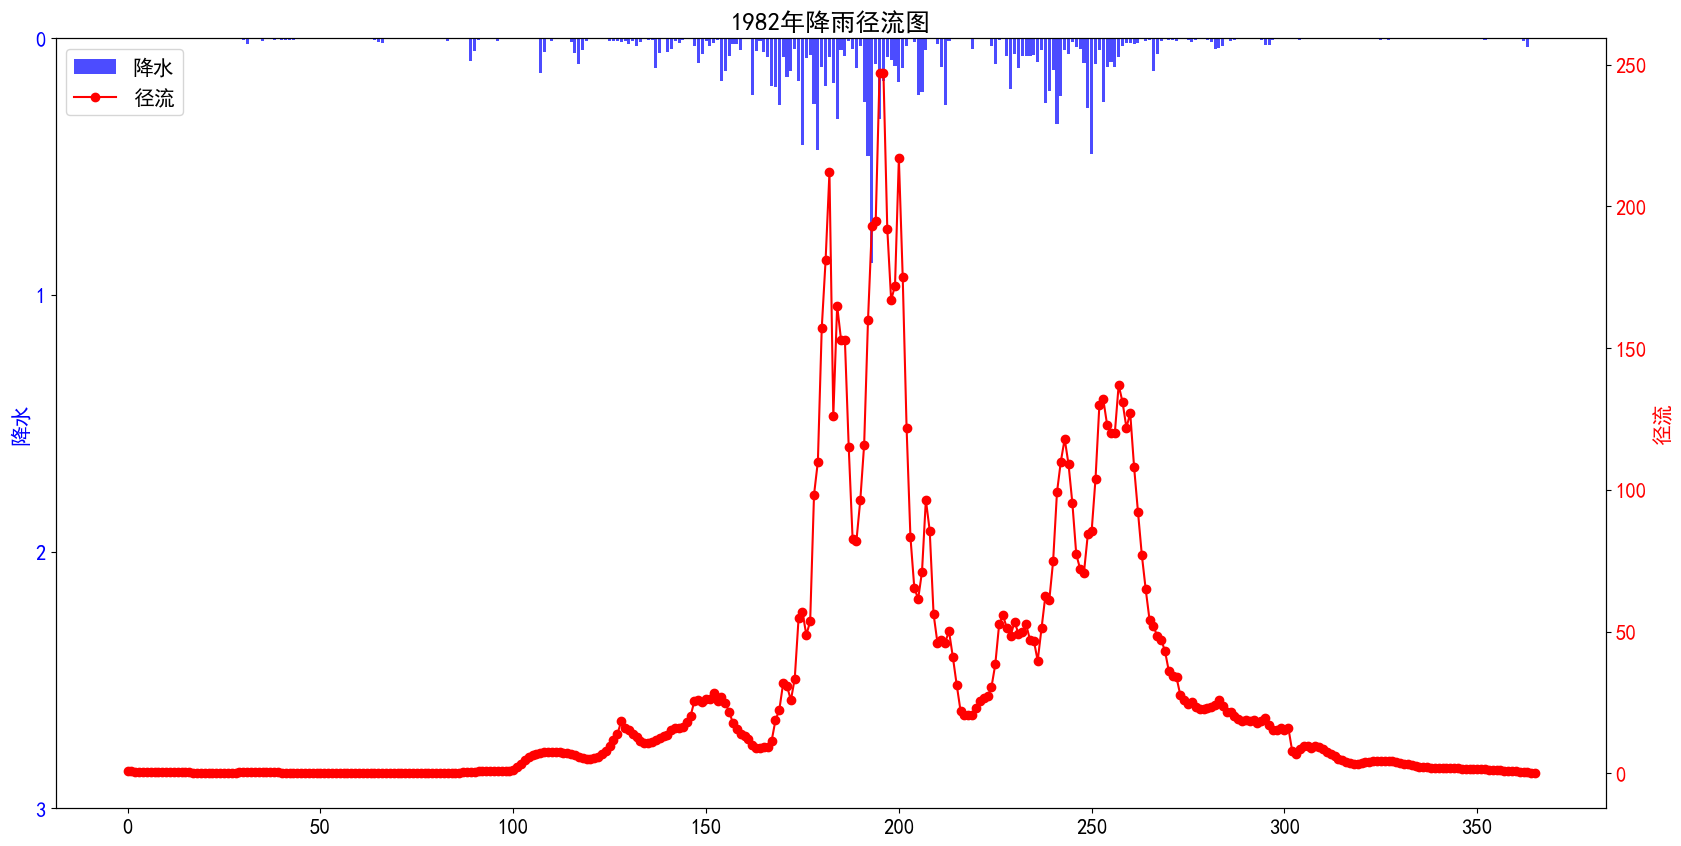

<Figure size 640x480 with 0 Axes>

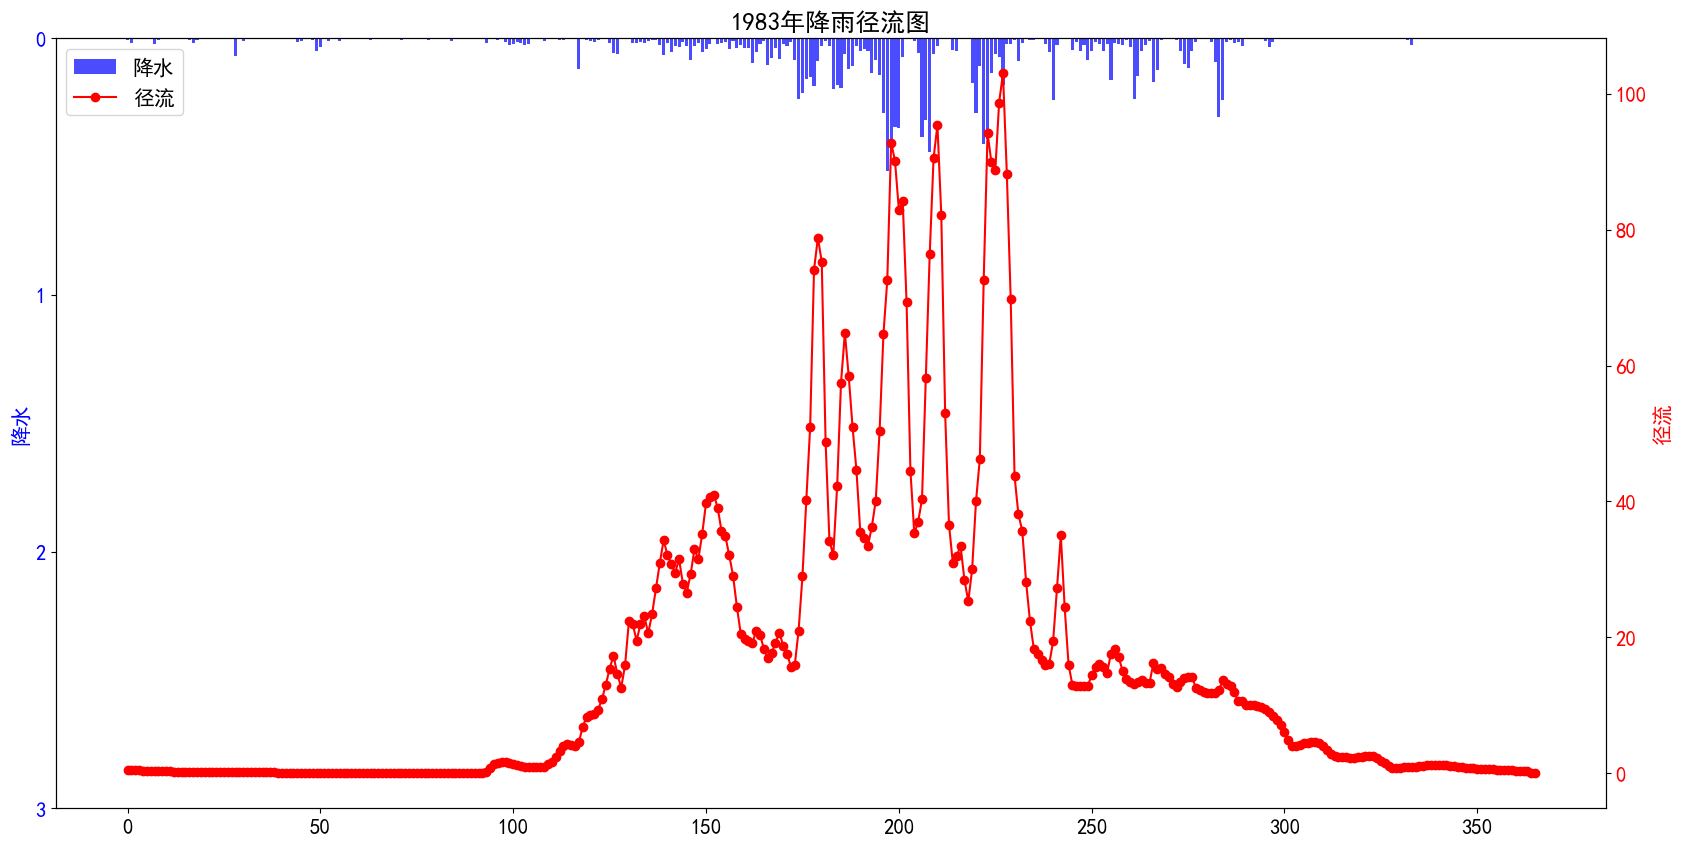

<Figure size 640x480 with 0 Axes>

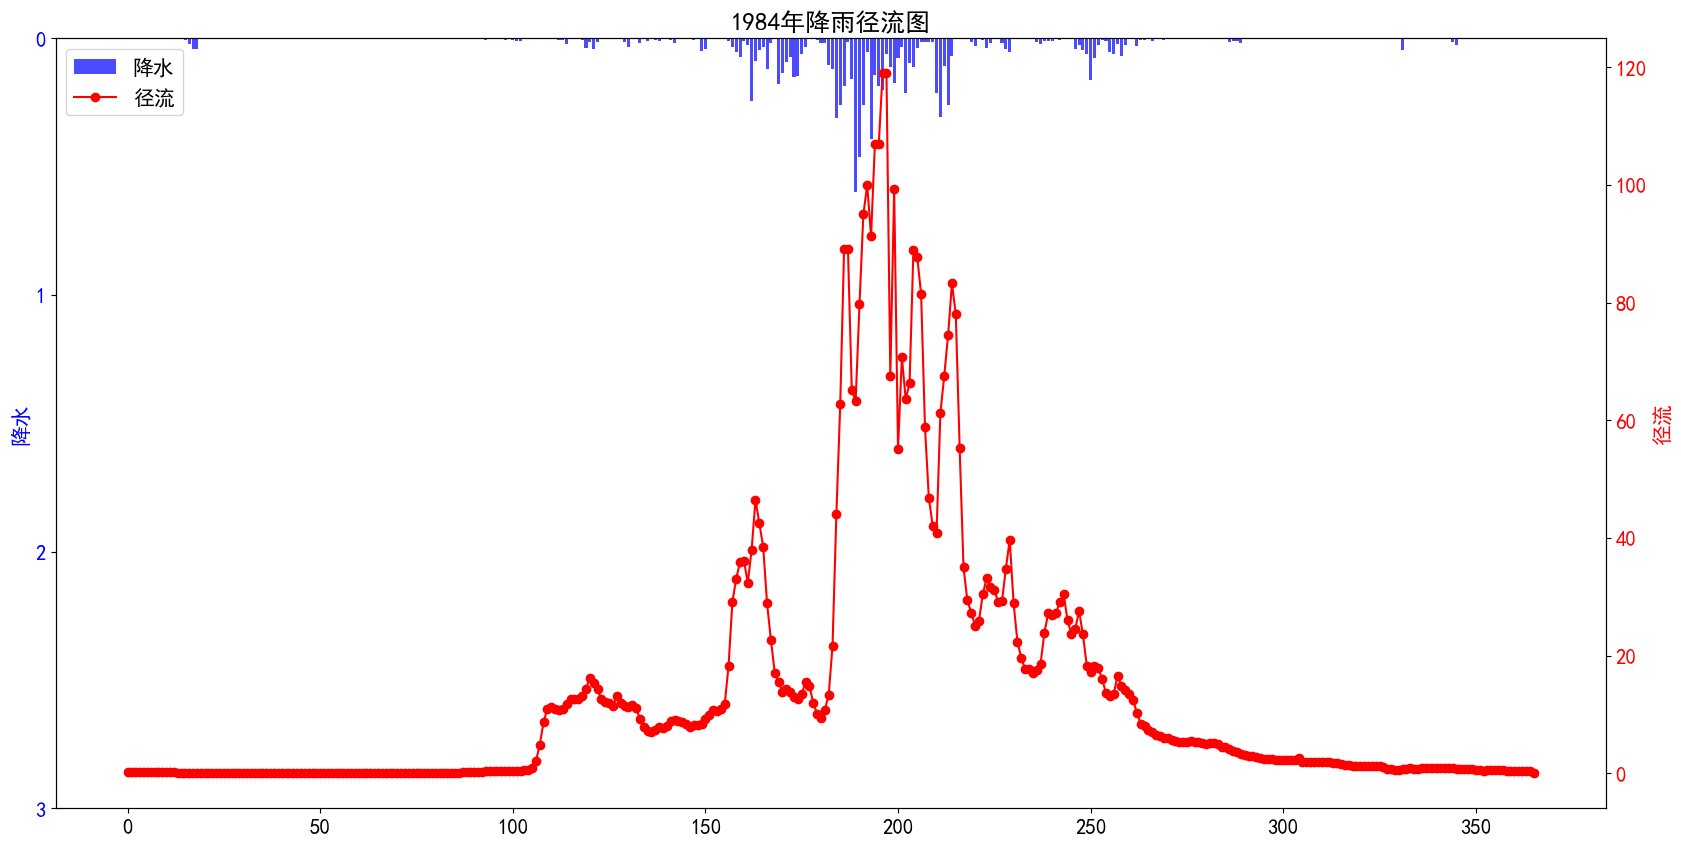

<Figure size 640x480 with 0 Axes>

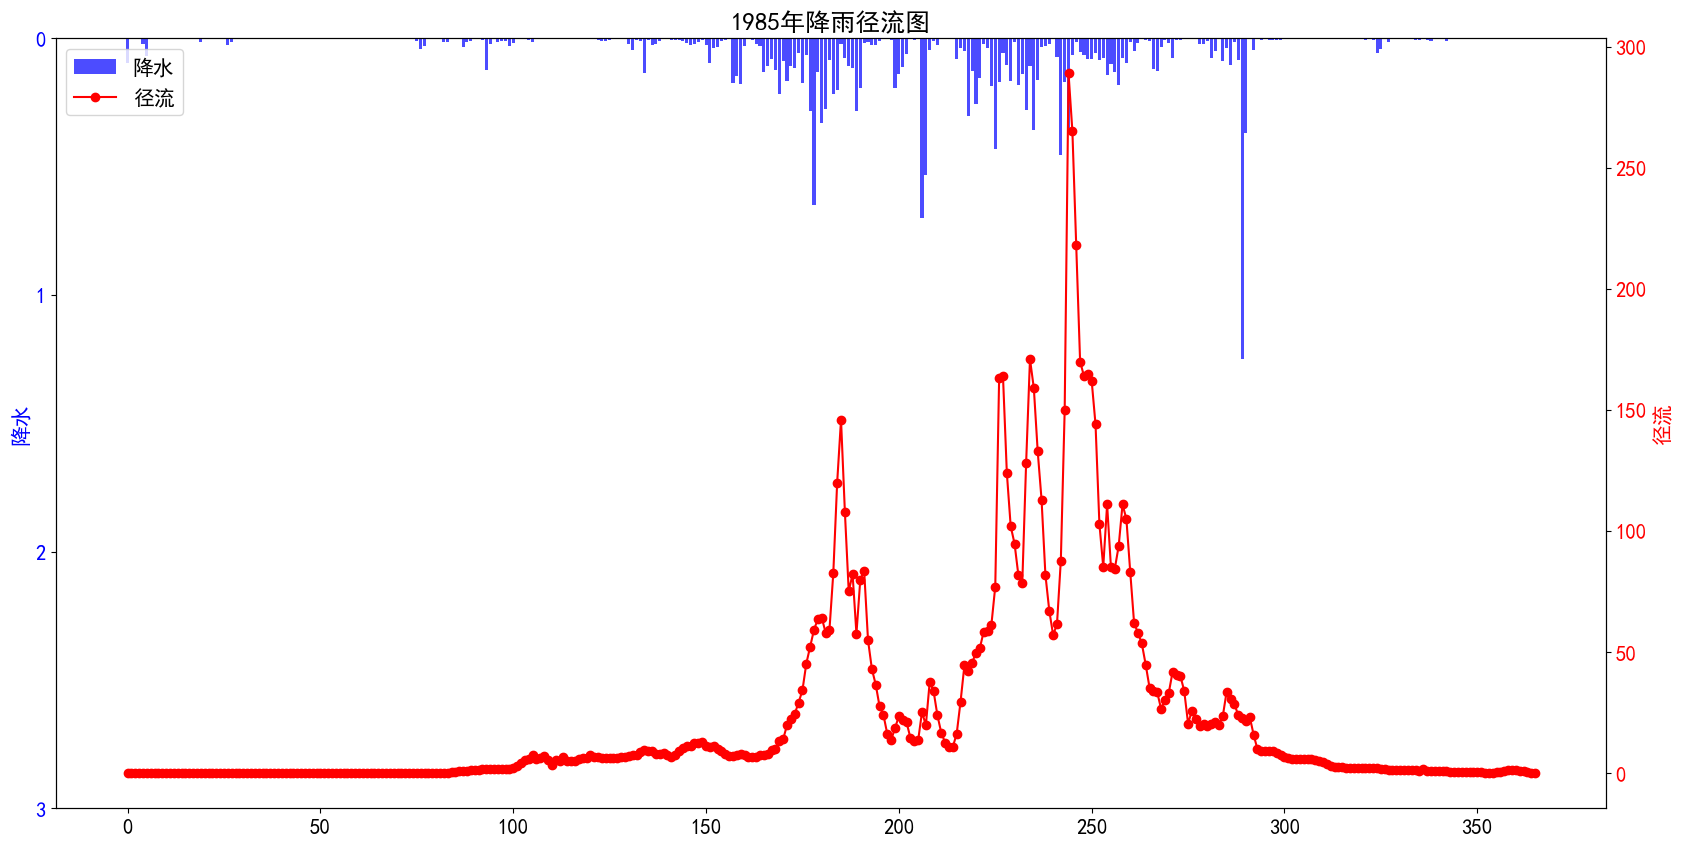

<Figure size 640x480 with 0 Axes>

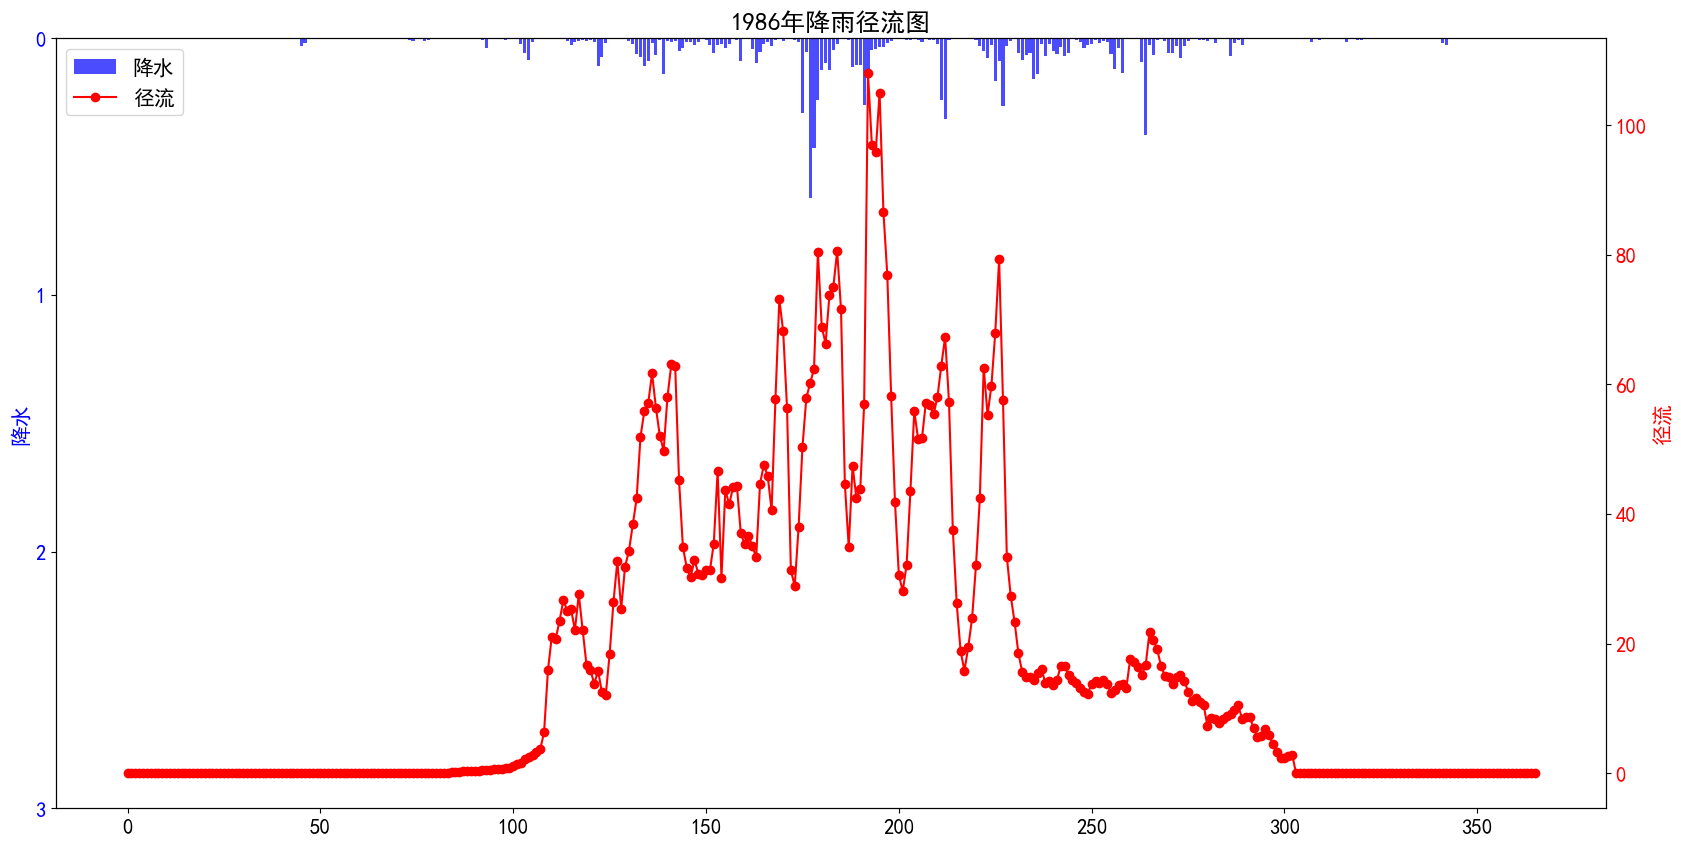

<Figure size 640x480 with 0 Axes>

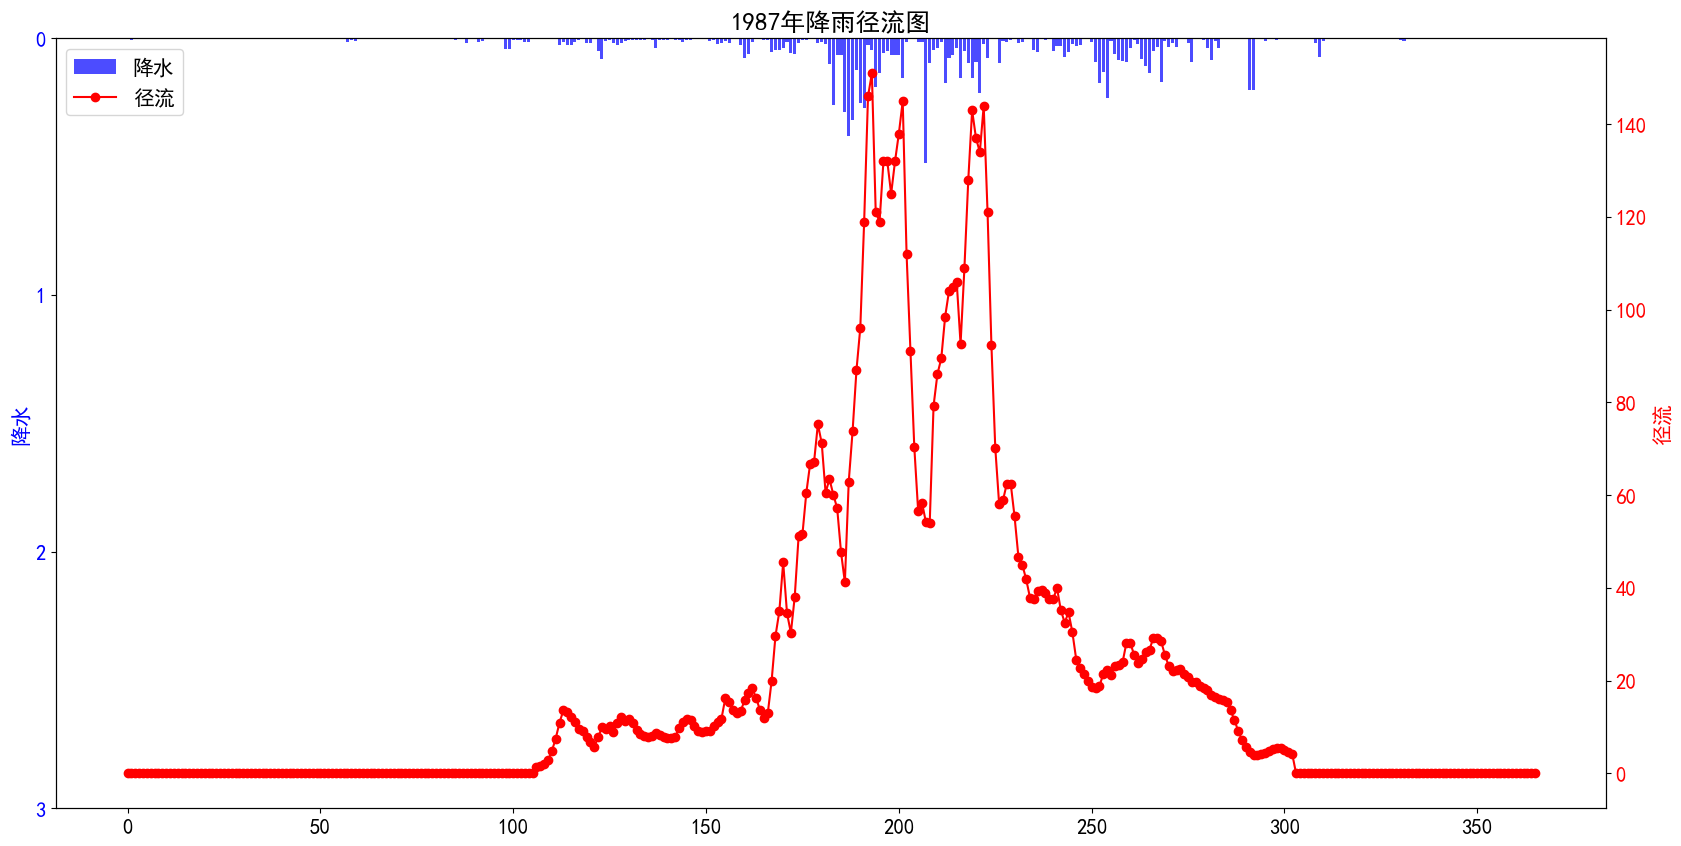

In [6]:

# 画图  
#  设置画图字体的大小
plt.rcParams.update({'font.size': 15})
#  解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['SimHei']
#  解决负号乱码问题
plt.rcParams['axes.unicode_minus'] = False
for year in range (1979 ,1988):
    plt.clf()
    # 读取数据
    x = np.arange(366)
    data1 = rain_APCParray[:,year-1979]
    data2 = flow_obsArray[:,year-1979]
    # 创建一个画布
    fig, ax1 = plt.subplots(figsize=(20,10))
    # 绘制柱状图以顶端为底（以顶端为底只要把bottom设置成0，再把y轴反向就ok）
    ax1.bar(x, data1, color='blue', alpha=0.7, label='降水', bottom=0)
    ax1.set_ylabel('降水', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_yticks(range(0,4))
    # 反转data1的y轴
    ax1.invert_yaxis()
    # 创建第二个y轴
    ax2 = ax1.twinx()
    # 绘制折线图在底部
    ax2.plot(x, data2, color='red', marker='o', label='径流')
    ax2.set_ylabel('径流', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    # 设置x轴标签
    plt.xlabel('X-axis')
    #命名
    plt.title(str(year)+'年降雨径流图')
    # 合并图例
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left')
    # 显示并保存图形
    plt.savefig('D:/CSSP/out_data/tuotuoriver/data/image/'+str(year)+'年降雨径流图.png')  # 指定文件名和文件格式（例如，.png）
    plt.show()
